In [1]:
import scipy.io
import numpy as np
from numpy import linalg as LA
import matplotlib
import time
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from functions import *
from numpy import random

In [2]:
# load data
mat = scipy.io.loadmat('face.mat')
raw_data = mat['X']

D,N = raw_data.shape

raw_data = np.transpose(raw_data)

training_data = np.empty([int(520*0.8), 2576])
testing_data = np.empty([int(520*0.2), 2576])

# create training and test data
for x in range(52):
    training_data[x*8:(x+1)*8] = raw_data[x*10:x*10+8]
    testing_data[x*2:(x+1)*2] = raw_data[x*10+8:(x+1)*10]

raw_data = np.transpose(raw_data)
training_data = np.transpose(training_data)
testing_data = np.transpose(testing_data)



In [3]:
# get mean image matrix
mean_face = training_data.mean(axis=1).reshape(-1,1)
show_img(mean_face)

rank of each matrix is the same : 415
Most of eigen values in normal pca should be 0. But instead are complex due to numeric error. need a way to discard small eigen vals


In [4]:
# generate principal components
# pca_eigw, pca_eigvec = normal_pca(training_data, mean_face)
lowdim_eigw, lowdim_eigvec = lowdim_pca(training_data, mean_face)

u_norm = lowdim_eigvec

shape of S :  (416, 416)
shape of w (416,)
shape of v (416, 416)
low dimension pca took  0.3682210445404053  seconds.


In [5]:
# eigen_analysis(pca_eigw, pca_eigvec, lowdim_eigw, lowdim_eigvec)

In [6]:
n = 400
faces = reconstruct(testing_data.T, mean_face.T, u_norm.T, n)

print("mean pixel error: ", get_err(training_data[:,0], faces[0]))


mean pixel error:  51.79874358408982


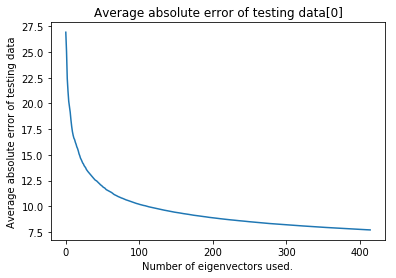

In [7]:
plot_err(training_data.T, testing_data.T, mean_face.T, u_norm.T, 0)

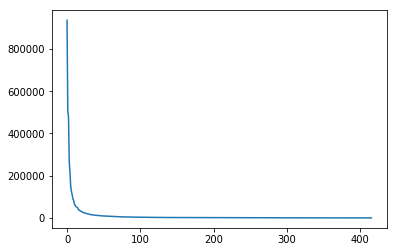

In [8]:
plt.plot(lowdim_eigw)

In [9]:
training_weights = np.matmul((training_data-mean_face).T, u_norm)
reconstructed_weights = np.matmul((testing_data-mean_face).T, u_norm[:,:n])

result = class_rate(training_weights[:,:n], reconstructed_weights)
print("classification rate: ", 100*np.sum(result)/len(result), "%.")


classification rate:  67.3076923076923 %.


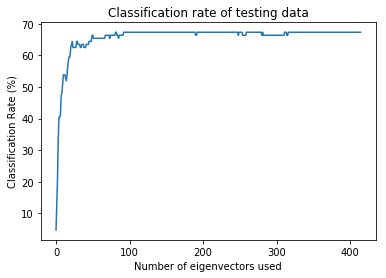

In [10]:
plot_class_rate(training_data.T, testing_data.T, mean_face.T, u_norm.T)


In [11]:
dist, indx = nn_class(training_data.T, faces)
print(len(indx))


104


In [12]:
#still checking
def confusion_mat(training_data, reconstructed):
    dist, indx = nn_class(training_data.T, reconstructed)
    TP, FP, FN, TN, accuracy, recall, precision = ([0]*52 for i in range(7)) 
    for cl in range(52):
        #compute TP and FN
        for item in range(2):
            if cl*8 <= indx[cl*2+item] <= (cl+1)*8:
                TP[cl] += 1
            else:
                FN[cl] += 1
                
        for item in [x for x in range(len(indx)) if x != cl*2 or x != cl*2+1]:
            if cl*8 <= indx[item] <= (cl+1)*8:
                FP[cl] += 1
            else:
                TN[cl] += 1
            
                    
#     print("TP: ", TP)
#     print("FN: ", FN)
#     print("FP: ", FP)
#     print("TN: ", TN)
    
    for i in range(len(TP)):
        accuracy[i] = 100*(TP[i] + TN[i])/(TP[i] + TN[i] + FP[i] + FN[i])
        if TP[i]+FN[i] == 0:
            recall[i] = 0
        else:
            recall[i] = 100*TP[i]/(TP[i]+FN[i])
        if TP[i]+FP[i] == 0:
            precision[i] = 0
        else:
            precision[i] = 100*TP[i]/(TP[i]+FP[i])
        
    for i in range(len(accuracy)):
        print("=========\tClass ", i ,"\t==========")
        print("accuracy :\t", accuracy[i])
        print("recall\t :\t", recall[i])
        print("precision:\t", precision[i])


In [13]:
confusion_mat(training_data, faces)

=========	Class  0 	==========
accuracy :	 98.11320754716981
recall	 :	 0.0
precision:	 0
=========	Class  1 	==========
accuracy :	 98.11320754716981
recall	 :	 0.0
precision:	 0
=========	Class  2 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  3 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  4 	==========
accuracy :	 96.22641509433963
recall	 :	 100.0
precision:	 33.333333333333336
=========	Class  5 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  6 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  7 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  8 	==========
accuracy :	 98.11320754716981
recall	 :	 100.0
precision:	 50.0
=========	Class  9 	==========
accuracy :	 96.22641509433963
recall	 :	 100.0
precision:	 33.333333333333336
=========	Class  10 	==========
